In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_images_from_folder(folder):
    images = []
    lables=[]
    c=-1
    d={}
    for file in os.listdir(folder):
        c+=1
        d[file]=c
        for filename in os.listdir(os.path.join(folder,file)):
            img = cv2.imread(os.path.join(folder,file,filename))
            if img is not None:
                images.append(img)
                lables.append([c])
    return images,lables

In [3]:
folder='dataset'

In [4]:
images,lables=load_images_from_folder(folder)

In [5]:
len(images)

2007

In [6]:
len(lables)

2007

In [7]:
images[0]

array([[[ 41,  30,  32],
        [ 41,  30,  32],
        [ 41,  30,  32],
        ...,
        [161, 137, 145],
        [161, 137, 145],
        [161, 137, 145]],

       [[ 41,  30,  32],
        [ 41,  30,  32],
        [ 41,  30,  32],
        ...,
        [161, 137, 145],
        [161, 137, 145],
        [161, 137, 145]],

       [[ 41,  30,  32],
        [ 41,  30,  32],
        [ 41,  30,  32],
        ...,
        [161, 137, 145],
        [161, 137, 145],
        [161, 137, 145]],

       ...,

       [[ 40,  32,  32],
        [ 39,  31,  31],
        [ 40,  32,  32],
        ...,
        [161, 137, 145],
        [161, 137, 145],
        [161, 137, 145]],

       [[ 40,  32,  32],
        [ 39,  31,  31],
        [ 40,  32,  32],
        ...,
        [161, 137, 145],
        [161, 137, 145],
        [161, 137, 145]],

       [[ 40,  32,  32],
        [ 39,  31,  31],
        [ 40,  32,  32],
        ...,
        [161, 137, 145],
        [161, 137, 145],
        [161, 137, 145]]

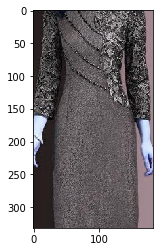

In [8]:
plt.imshow(images[0]) 

In [9]:
images[0].shape

(332, 183, 3)

In [10]:
img = cv2.resize(images[0],(150,250))

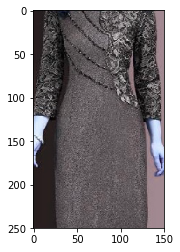

In [11]:
plt.imshow(img)

In [12]:
cleaned_images=[]
for i in range(len(images)):
    #image = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    cleaned_images.append(cv2.resize(image,(150,250)))

In [13]:
cleaned_images[i]

array([[241, 241, 241, ...,  49,  64,  64],
       [241, 241, 241, ...,  51,  71,  80],
       [241, 241, 241, ...,  68,  79,  83],
       ...,
       [240, 240, 239, ..., 181, 182, 179],
       [240, 240, 239, ..., 185, 182, 176],
       [240, 240, 239, ..., 182, 181, 184]], dtype=uint8)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_images, lables, test_size=0.2, random_state=42)

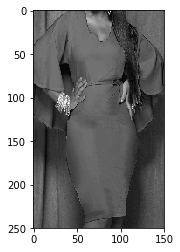

In [15]:
plt.imshow(X_train[0],cmap='gray')

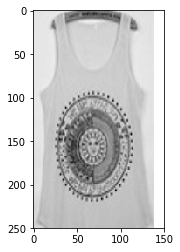

In [16]:
plt.imshow(X_test[0],cmap='gray')

In [17]:
X_test=np.array(X_test)


In [18]:
X_train=np.array(X_train)

In [19]:
X_train.shape

(1605, 250, 150)

In [20]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [21]:
X_train[0]

array([[0.42745098, 0.43529412, 0.41960785, ..., 0.42352942, 0.39215687,
        0.3882353 ],
       [0.42352942, 0.43529412, 0.42352942, ..., 0.43137255, 0.3764706 ,
        0.38431373],
       [0.44705883, 0.4509804 , 0.40392157, ..., 0.39215687, 0.36862746,
        0.38039216],
       ...,
       [0.43529412, 0.40784314, 0.42745098, ..., 0.3764706 , 0.37254903,
        0.3647059 ],
       [0.40784314, 0.43529412, 0.43137255, ..., 0.38039216, 0.34509805,
        0.3372549 ],
       [0.44705883, 0.40784314, 0.40392157, ..., 0.3529412 , 0.38431373,
        0.34901962]], dtype=float32)

In [22]:
X_train.shape

(1605, 250, 150)

In [23]:
X_test.shape

(402, 250, 150)

In [24]:
X_train=X_train.reshape(1605, 250, 150, 1)

In [25]:
X_test=X_test.reshape(402, 250, 150, 1)

In [26]:
X_train[0]

array([[[0.42745098],
        [0.43529412],
        [0.41960785],
        ...,
        [0.42352942],
        [0.39215687],
        [0.3882353 ]],

       [[0.42352942],
        [0.43529412],
        [0.42352942],
        ...,
        [0.43137255],
        [0.3764706 ],
        [0.38431373]],

       [[0.44705883],
        [0.4509804 ],
        [0.40392157],
        ...,
        [0.39215687],
        [0.36862746],
        [0.38039216]],

       ...,

       [[0.43529412],
        [0.40784314],
        [0.42745098],
        ...,
        [0.3764706 ],
        [0.37254903],
        [0.3647059 ]],

       [[0.40784314],
        [0.43529412],
        [0.43137255],
        ...,
        [0.38039216],
        [0.34509805],
        [0.3372549 ]],

       [[0.44705883],
        [0.40784314],
        [0.40392157],
        ...,
        [0.3529412 ],
        [0.38431373],
        [0.34901962]]], dtype=float32)

In [27]:
(y_train)

[[5],
 [1],
 [3],
 [8],
 [1],
 [5],
 [4],
 [4],
 [8],
 [4],
 [2],
 [12],
 [8],
 [3],
 [10],
 [9],
 [3],
 [0],
 [7],
 [1],
 [0],
 [1],
 [7],
 [8],
 [2],
 [8],
 [7],
 [12],
 [9],
 [9],
 [9],
 [9],
 [12],
 [2],
 [3],
 [4],
 [12],
 [6],
 [12],
 [3],
 [11],
 [2],
 [6],
 [2],
 [1],
 [9],
 [12],
 [1],
 [8],
 [7],
 [5],
 [6],
 [3],
 [0],
 [6],
 [0],
 [8],
 [12],
 [12],
 [2],
 [12],
 [5],
 [9],
 [1],
 [2],
 [8],
 [10],
 [2],
 [1],
 [1],
 [6],
 [1],
 [3],
 [2],
 [3],
 [5],
 [10],
 [5],
 [8],
 [6],
 [2],
 [1],
 [4],
 [9],
 [12],
 [1],
 [2],
 [3],
 [12],
 [3],
 [2],
 [10],
 [2],
 [8],
 [2],
 [12],
 [3],
 [6],
 [4],
 [8],
 [2],
 [10],
 [9],
 [4],
 [10],
 [6],
 [9],
 [12],
 [11],
 [11],
 [1],
 [1],
 [12],
 [8],
 [12],
 [10],
 [8],
 [1],
 [10],
 [4],
 [5],
 [2],
 [10],
 [6],
 [10],
 [11],
 [3],
 [2],
 [8],
 [7],
 [6],
 [11],
 [0],
 [4],
 [11],
 [10],
 [12],
 [5],
 [3],
 [4],
 [1],
 [7],
 [6],
 [10],
 [8],
 [5],
 [11],
 [9],
 [9],
 [4],
 [9],
 [0],
 [1],
 [7],
 [0],
 [10],
 [7],
 [6],
 [0],
 [6],
 [3]

In [28]:
from keras.utils import np_utils
import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(X_train, X_valid) = X_train[100:], X_train[:100]
(y_train, y_valid) = y_train[100:], y_train[:100]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (1505, 250, 150, 1)
1505 train samples
402 test samples
100 validation samples


In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(250, 150, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 150, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 75, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 75, 32)       2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 37, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 18, 64)        0         
__________

In [30]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [31]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=100, epochs=20,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=1,shuffle=True)

Train on 1505 samples, validate on 100 samples
Epoch 1/20
1505/1505 [==============================] - 16s 11ms/step - loss: 3.0932 - acc: 0.0811 - val_loss: 2.5714 - val_acc: 0.0300

Epoch 00001: val_loss improved from inf to 2.57144, saving model to model.weights.best.hdf5
Epoch 2/20
1505/1505 [==============================] - 7s 4ms/step - loss: 2.5567 - acc: 0.0963 - val_loss: 2.5660 - val_acc: 0.0700

Epoch 00002: val_loss improved from 2.57144 to 2.56596, saving model to model.weights.best.hdf5
Epoch 3/20
1505/1505 [==============================] - 7s 4ms/step - loss: 2.5455 - acc: 0.1096 - val_loss: 2.5677 - val_acc: 0.1300

Epoch 00003: val_loss did not improve from 2.56596
Epoch 4/20
1505/1505 [==============================] - 7s 4ms/step - loss: 2.5260 - acc: 0.1216 - val_loss: 2.5356 - val_acc: 0.1400

Epoch 00004: val_loss improved from 2.56596 to 2.53557, saving model to model.weights.best.hdf5
Epoch 5/20
1505/1505 [==============================] - 7s 4ms/step - loss: 

In [32]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [33]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.17412935345623623
